# This notebook explores how outliers are detected in a dataset

In [56]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# load a dataset
data = pd.read_csv('weight-height.csv')

In [15]:
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [16]:
data.describe().round(2)

,Height,Weight
count,10000.00,10000.00
mean,66.37,161.44
std,3.85,32.11
min,54.26,64.70
25%,63.51,135.82
50%,66.32,161.21
75%,69.17,187.17
max,79.00,269.99


The data shows distribution of height and weight.<br>
Height is in <i>inches</i> and weight is in <i>pounds</i>.

<Axes: xlabel='Height', ylabel='Count'>

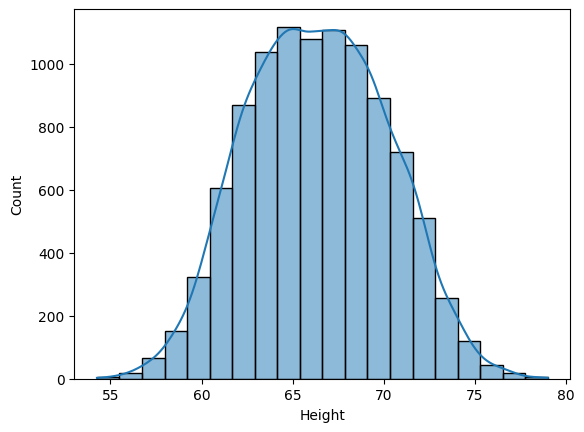

In [17]:
# plot a histogram plot for height and weight
sns.histplot(data,x='Height',kde=True,bins=20)

<Axes: xlabel='Weight', ylabel='Count'>

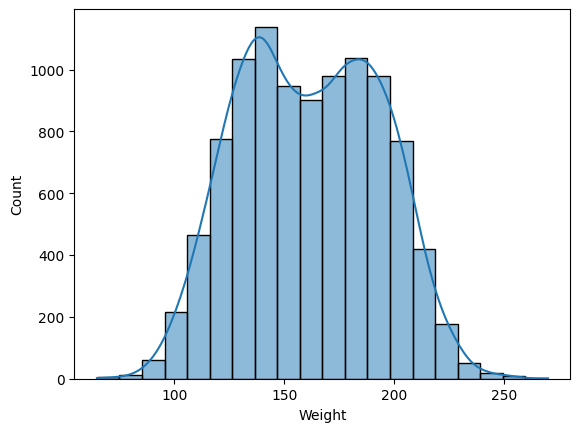

In [18]:
sns.histplot(data,x='Weight',kde=True,bins=20)

We see that both height and weight are distributed normally, i.e., they follow normal distribution. So we can apply specific methods based on normal distribution to detect outliers.

There are several methods of outlier detection. Three of them are illustrated here:
1. n-Standard Deviation
2. z-Score
3. Inter Quartile Range

## n-Standard Deviation

In this method, we consider all the points outside n-standard deviations as outliers.<br>
For instance:<br>
If we consider a 2 standard deviation method, any method lying outside that 2 standard deviations will be considered outlier. The parameter 'n' is chosen based on data and its distribution.

In [42]:
# let us detect outliers in height column using 3-Standard Deviation method

# compute standard deviation
std_dev = data['Height'].std()

# group data according to conditions - 
# if (datapoint > mean+3*std_dev) or (datapoint < mean-3*std_dev) --> point is an outlier

# extract outliers
outliers_3std = data[(data['Height'] > data['Height'].mean() + 3*std_dev) |
                     (data['Height'] < data['Height'].mean() - 3*std_dev)]

In [43]:
# print the outliers dataframe
outliers_3std

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


We see that we obtain 7 outliers using the <b>3-Standard Deviation method.</b>

In [44]:
# if we use 2 standard deviation method
outliers_2std = data[(data['Height'] > data['Height'].mean() + 2*std_dev) | 
                     (data['Height'] < data['Height'].mean() - 2*std_dev)]

In [45]:
outliers_2std

,Gender,Height,Weight
2,Male,74.110105,212.740856
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
...,...,...,...
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551
9913,Female,58.351003,110.122151


We obtain 348 outliers using the <b>2 Standard Deviation method</b>.

Text(0.5, 1.0, 'Outliers obtained from 3-Standard Deviation method')

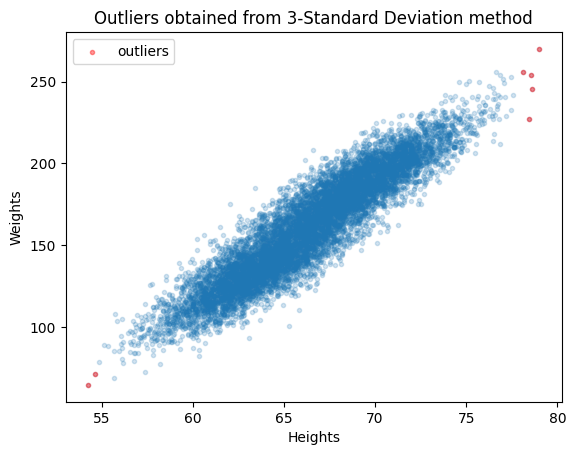

In [63]:
# plot outliers
plt.scatter(data['Height'],data['Weight'],alpha=0.2,marker='.')
plt.scatter(outliers_3std['Height'],outliers_3std['Weight'],color='r',alpha=0.4,marker='.',label='outliers')
plt.legend()
plt.ylabel('Weights')
plt.xlabel('Heights')
plt.title('Outliers obtained from 3-Standard Deviation method')

Text(0.5, 1.0, 'Outliers obtained from 2-Standard Deviation method')

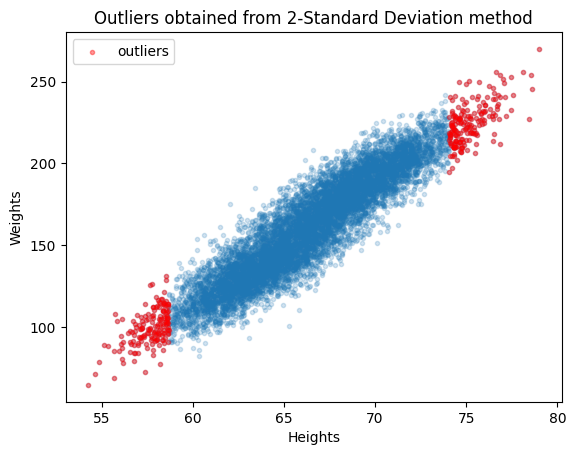

In [64]:
# plot outliers
plt.scatter(data['Height'],data['Weight'],alpha=0.2,marker='.')
plt.scatter(outliers_2std['Height'],outliers_2std['Weight'],
            color='r',alpha=0.4,marker='.',label='outliers')
plt.legend()
plt.ylabel('Weights')
plt.xlabel('Heights')
plt.title('Outliers obtained from 2-Standard Deviation method')

## Z-Score

This method is similar to n-Standard Deviation method.<br>
The only difference is we obtained z-score of each point by standardizing data. Then, we extract outliers using the logic -- |z-score| > threshold (usually 3)

<b>Z-Score:</b>It indicates how many standard deviations away a datapoint is from mean.<br>
<b>Formula:</b> $Z_{\text{score}} = \frac{x - \mu}{\sigma}$ (Standardization)

In [48]:
# calculate z-score for ecah datapoint
data['z_score'] = (data['Height'] - data['Height'].mean()) / data['Height'].std()

In [49]:
data

,Gender,Height,Weight,z_score
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090


In [50]:
# see description of data
data.describe().round(2)

,Height,Weight,z_score
count,10000.00,10000.00,10000.00
mean,66.37,161.44,0.00
std,3.85,32.11,1.00
min,54.26,64.70,-3.15
25%,63.51,135.82,-0.74
50%,66.32,161.21,-0.01
75%,69.17,187.17,0.73
max,79.00,269.99,3.28


We see that max and min values of <i>z_score</i> is 3.28 and -3.15.<br>
We select threshold to |3|

In [54]:
# extract the outliers
outliers_z_score = data[abs(data['z_score']) > 3]
# extract datapoints for z-score <-3 and >3 

In [55]:
outliers_z_score

,Gender,Height,Weight,z_score
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [58]:
outliers_z_score['Height'].count()

np.int64(7)

We obtain 7 outliers, which is same number as in 3-Standard Deviation method.

In [59]:
# compare with outliers obtained from 3-Standard Deviation method.
np.array(outliers_3std['Height']) == np.array(outliers_z_score['Height'])

array([ True,  True,  True,  True,  True,  True,  True])

We see that all the outilers obtained are same in both cases. This is because both approaches are based on same principles, the Standard Deviation.

Text(0.5, 1.0, 'Outliers obtained from Z-Score method')

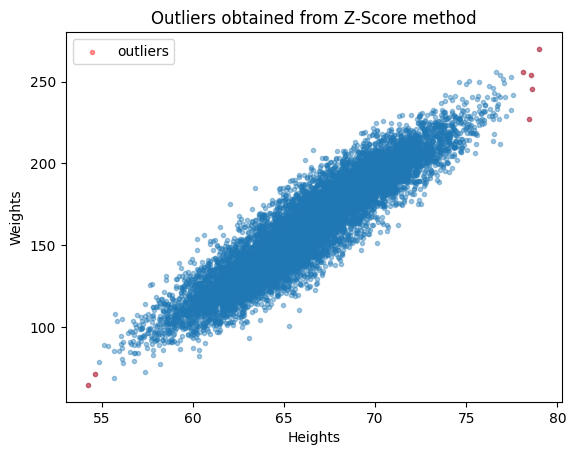

In [66]:
# plot outliers obtained from z score
plt.scatter(data['Height'],data['Weight'],alpha=0.4,marker='.')
plt.scatter(outliers_z_score['Height'],outliers_z_score['Weight'],
            alpha=0.4,c='r',marker='.',label='outliers')
plt.legend()
plt.ylabel('Weights')
plt.xlabel('Heights')
plt.title('Outliers obtained from Z-Score method')

# Inter Quartile Range Method

This method is based on concept of Percentiles and Quartiles.

![Percentiles Image Here](percentiles.png)

xth Percentile indicated a value below which x% of all datapoints lie in the given data.<br><br>
Example: 25th percentile indicated a value of datapoint below which 25% of datapoints exist. i.e., if 25th percentile = 5.89, it indicates 25% of values are below 5.89.

Quartiles divide density of data into 4 equal parts. This indicates,<br>
1. 25th percentile is 1st Quartile
2. 50th percentile --> 2nd Quartile
3. 75th percentile --> 3rd Quartile
4. 100th percentile --> 4th quartile.

IQR Method to detect outliers:
1. Calculate 1st and 3rd Quartiles
2. Calculate IQR
3. Calculate upper and lower limits
4. Extract outliers based on the logic --> (datapoint > upper limit) or (datapoint < lower limit) --> outlier.

<b>Formulae:</b><br>
1. $IQR = Q_{3} - Q_{1}$
2. $limit_{lower} = Q_{1} - 1.5IQR$
3. $limit_{upper} = Q_{2} + 1.5IQR$

In [76]:
# implement IQR method 

# calculate 1st and 3rd quartiles
q1 = np.percentile(data['Height'],25)
q3 = np.percentile(data['Height'],75)
q1,q3

(np.float64(63.505620481218955), np.float64(69.1742617268347))

In [77]:
# calculate IQR
iqr = q3 - q1
iqr

np.float64(5.668641245615746)

In [78]:
# calculate upper and lower limits
lower_limit_iqr = q1 - (1.5 * iqr)
upper_limit_iqr = q3 + (1.5 * iqr)

In [79]:
# extract outliers

outliers_iqr = data[(data['Height'] < lower_limit_iqr) |
                    (data['Height'] > upper_limit_iqr)]

In [80]:
outliers_iqr

,Gender,Height,Weight,z_score
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
7294,Female,54.873728,78.606670,-2.987329
9285,Female,54.263133,64.700127,-3.146027


In [81]:
outliers_iqr['Height'].count()

np.int64(8)

We obtain 8 outliers, different number from the first 2 methods since it is based on different principles as explained above.

Text(0.5, 1.0, 'Outliers obtained from IQR method')

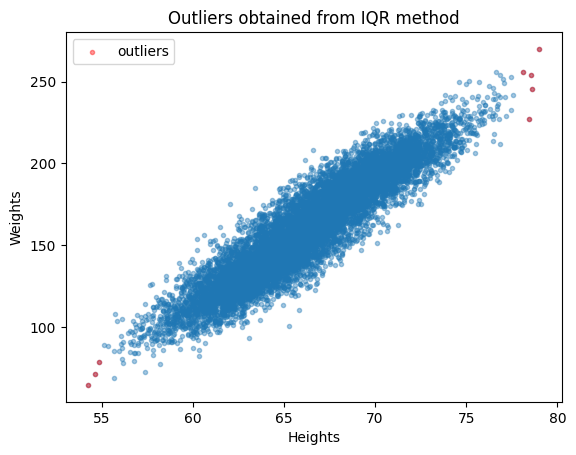

In [82]:
# plot outliers obtained from IQR
plt.scatter(data['Height'],data['Weight'],alpha=0.4,marker='.')
plt.scatter(outliers_iqr['Height'],outliers_iqr['Weight'],
            alpha=0.4,c='r',marker='.',label='outliers')
plt.legend()
plt.ylabel('Weights')
plt.xlabel('Heights')
plt.title('Outliers obtained from IQR method')

So these are some of the different methods of outlier detection. First two methods discussed always result in same outliers. IQR method is a quite different one.

Outlier detection of heights has been implemented here. You can try out the same for weights too.